In [147]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Weibull distribution
Ref scipy.stats: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html

Ref, wiki ru: https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%92%D0%B5%D0%B9%D0%B1%D1%83%D0%BB%D0%BB%D0%B0

First  8  of Weibull:
 [0.385952   0.02009373 0.58811637 3.08815463 0.08553817 1.20823551
 0.18164436 2.07178064]
Mean of Weibull: 1.0205842610087992


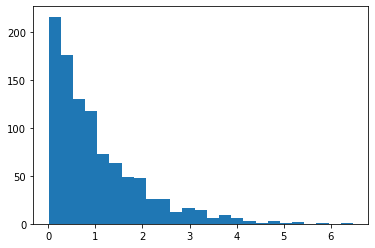

In [148]:
k=1 # парамтр формы
weibull = np.random.weibull(k, 1000)
N=8 # количество для показа
print ('First ', N , ' of Weibull:\n', weibull[:N])
print ('Mean of Weibull:',  np.mean(weibull))
plt.hist(weibull, 25)
plt.show()

Weibull mean: 1.0 
Weibull variance: 1.0 

Random Weibull variates, first 8 :
 [0.91955209 0.34531956 1.34633172 0.42395373 1.06710491 0.08287127
 0.85381608 1.15593748]


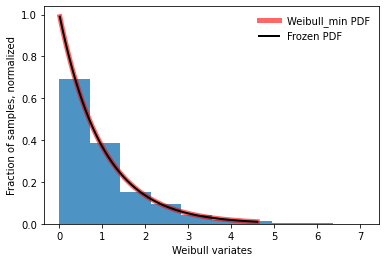

In [149]:
fig, ax = plt.subplots(1, 1)
c = 1
mean, var, skew, kurt = sts.weibull_min.stats(c, moments='mvsk')
# var -> variance = σ^2 (sigma square)
print('Weibull mean:', mean, '\nWeibull variance:', var, '\n')

x = np.linspace(weibull_min.ppf(0.01, c), 
                weibull_min.ppf(0.99, c), 100)
# ppf - Percent point function (inverse of cdf — percentiles).

ax.plot(x, weibull_min.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='Weibull_min PDF')

# Frozen PDF
rv = weibull_min(c) 
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='Frozen PDF')

# Random Weibull variates
r_weibull = weibull_min.rvs(c, size=1000)
print('Random Weibull variates, first',N,':\n', r_weibull[:N]) 
ax.hist(r_weibull, density=True, histtype='stepfilled', alpha=1.8)
ax.legend(loc='best', frameon=False)
plt.ylabel('Fraction of samples, normalized')
plt.xlabel('Weibull variates')
plt.show()

# Оценка выборочного среднего

Оценить **распределение выборочного среднего** вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) **сгенерируйте 1000 выборок объёма n** и постройте **гистограммы распределений их выборочных средних**.

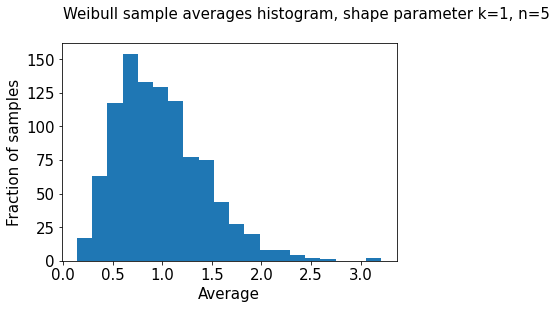

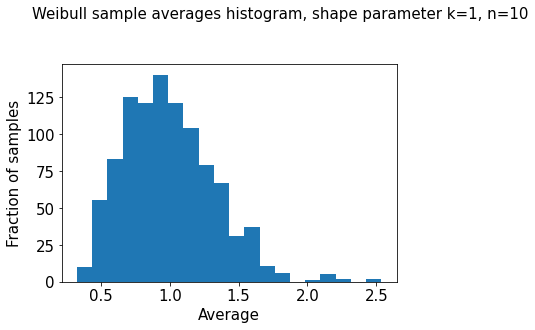

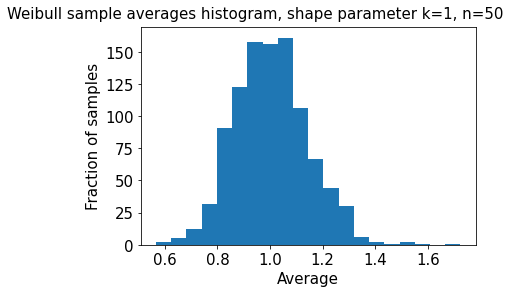

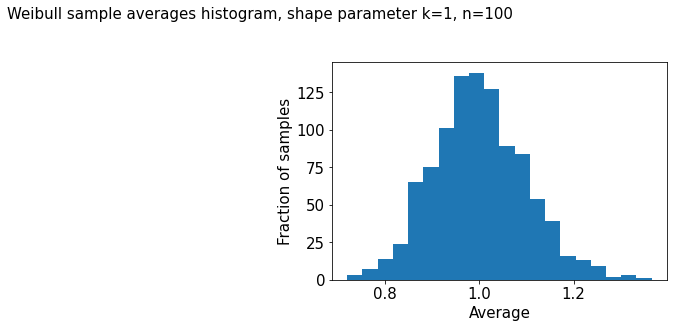

In [156]:
N=[5, 10, 50, 100]
weibull_mean = {}
shape = 1
for k in range(len(N)):
    temp_mean = []
    for i in range(1000):    
        weibull = np.random.weibull(shape, N[k]) 
        temp_mean.append(np.mean(weibull))
    weibull_mean[N[k]] = np.asarray(temp_mean)
    plt.hist(weibull_mean[N[k]], 20)
    plt.ylabel('Fraction of samples')
    plt.xlabel('Average')
    plt.rcParams["font.size"] = "15"
    plt.text(mean - 1, 180-k*2 ,'Weibull sample averages histogram, shape parameter k=1, n='+str(N[k]) )
    plt.show()

# Посчитайте значения параметров нормальных распределений

Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

We suppose for the Weibull ditribution: ${\bf λ = 1 ;  k = 1}$

Then Weibull ditribution parameters: 
$$mean_w = 1$$
$$\sigma_w^2 = \lambda^2 * \left( \left(1+\frac{2}{k}\right) - \left(1+\frac{1}{k}\right) \right)^2 =  \left( \left(1+2\right) - \left(1+1\right) \right)^2 = (3-2)^2 = 1^2 = 1$$

### According to the Central limit theorem (Согласно ЦПТ)

**Normal distribution** of \[Weibull\] sample averages (распределение выборочных средних) $N(mean_N, \sigma_N^2)$:

$$ mean_N = mean_w = 1$$
$$\sigma_N^2 = \frac{\sigma_w^2}{n} = \frac{1}{n}$$

# Сравнение аппроксимации выборочных средних
Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

| n, samples | $ {\bf \sigma^2}$ | ${\bf \sigma}$ |
| --- | --- | --- |
| 5 | 0.2 | 0.45 |
| 10 | 0.1 | 0.32 |
| 50 | 0.02 | 0.14 |

С ростом **n** точность аппроксимации выборочных средних возрастает так как среднеквадратичное отклонение ${\bf \sigma}$ уменьшается в ${\bf \sqrt{n}}$ раз.